# Notebook para evaluación del SRI Vectorial

## Configuración inicial

In [1]:
# Cranfield load
from engine.cranfield import CranfieldGetter as Getter
from engine.cranfield import dataset

In [2]:
# Model load
from engine.lsi import LatentSemanticIRS as IRS

In [3]:
# Get id of all documents
all_docs=[d.doc_id for d in dataset.docs_iter()]

In [4]:
# Setup system
IRS = IRS()
IRS.data_getter=Getter()

In [5]:
# Index the documents
IRS.add_documents(all_docs)
IRS.collection.index.loadBlockValues()

In [6]:
# Import Qrels and metrics
import engine.metrics as m
from engine.cranfield import CranfieldQrelsGetter as QrelGetter

# Maximum relevance definition
class MaxRelMetric(m.IRSMetric):
    def calculate(self, irs, qrel) -> float:
        return max((r for _,r in irs.pre_query(qrel.query)))

METRICS = {
    'Time': m.TimeMetric(), # In seconds
    'Prec':m.PrecisionMetric(),
    'Rec':m.RecoveryMetric(),
    'F1':m.F1Metric(),
    'Max': MaxRelMetric()
}

In [7]:
# Qrels load
QRELS=QrelGetter().getqrels()

In [8]:
from typing import Iterable

# Result of each metric in the model
RESULTS={}

## Cálculo

In [9]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

In [10]:
def print_results(metric):
    results = RESULTS[metric]

    ser = pd.Series(pd.cut(results, 15))
    grouped=ser.groupby(ser).count()

    df=pd.DataFrame(grouped.values,grouped.index)
    df.index.name='Intervalo'
    df.columns=['Frecuencia Absoluta']

    total=df['Frecuencia Absoluta'].sum()

    df['Frecuencia Relativa']=df['Frecuencia Absoluta']/total
    df['Porcentaje']=df['Frecuencia Relativa']*100
    df['Marca de Clase']=df.index.map(lambda x:x.mid)

    print(f'Promedio: {np.mean(results):.5f}')
    print(f'Máximo: {np.max(results):.5f}')
    print(f'Mínimo: {np.min(results):.5f}')
    print(f"Moda: {[float(x) for x in (df.loc[df['Frecuencia Absoluta'] == df.max()['Frecuencia Absoluta']]['Marca de Clase']).values]}")
    print(f"Mediana: {np.median(results):.5f}")
    print(f"Desviación estándar: {np.std(results):.5f}")
    
    print("\nCuartiles:")
    print(f"\tQ1:{np.quantile(results,.25)}")
    print(f"\tQ3:{np.quantile(results,.75)}")

    return df


def plot(metric):
    # Plotting
    plt.style.use('ggplot')
    plt.figure(figsize=(9, 5))
    plt.hist(RESULTS[metric], bins=15)

    return plt.show()


### Tiempo de procesado de la consulta en segundos

In [11]:
metric='Time'

RESULTS[metric] =np.fromiter((
    METRICS[metric].calculate_all(IRS, QRELS)),dtype=float)


In [12]:
print_results(metric)

Promedio: 0.29861
Máximo: 0.51740
Mínimo: 0.27640
Moda: [0.3005]
Mediana: 0.29500
Desviación estándar: 0.02138

Cuartiles:
	Q1:0.2892
	Q3:0.3011


,Frecuencia Absoluta,Frecuencia Relativa,Porcentaje,Marca de Clase
Intervalo,,,,
"(0.276, 0.292]",88,0.391111,39.111111,0.2840
"(0.292, 0.309]",105,0.466667,46.666667,0.3005
"(0.309, 0.325]",22,0.097778,9.777778,0.3170
"(0.325, 0.341]",3,0.013333,1.333333,0.3330
"(0.341, 0.357]",4,0.017778,1.777778,0.3490
"(0.357, 0.373]",1,0.004444,0.444444,0.3650
"(0.373, 0.389]",0,0.000000,0.000000,0.3810
"(0.389, 0.405]",0,0.000000,0.000000,0.3970
"(0.405, 0.421]",0,0.000000,0.000000,0.4130


#### Histograma de frecuencia

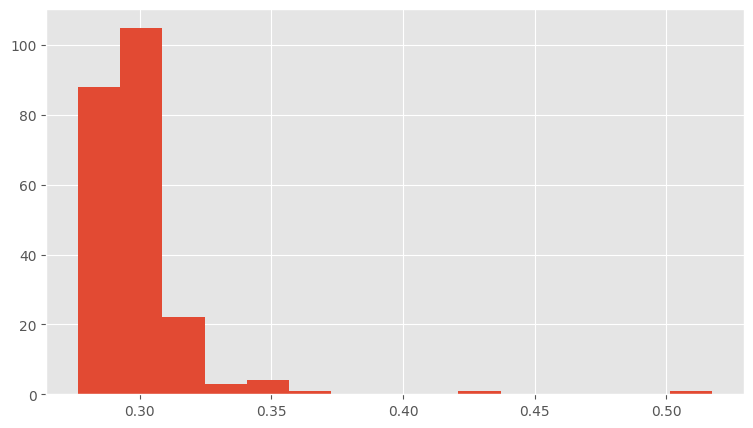

In [13]:
plot(metric)

### Precisión

In [14]:
metric='Prec'

RESULTS[metric] =np.fromiter((
    METRICS[metric].calculate_all(IRS, QRELS)),dtype=float)



In [15]:
print_results(metric)

Promedio: 0.16473
Máximo: 1.00000
Mínimo: 0.00000
Moda: [0.03285]
Mediana: 0.08333
Desviación estándar: 0.21933

Cuartiles:
	Q1:0.0
	Q3:0.25


,Frecuencia Absoluta,Frecuencia Relativa,Porcentaje,Marca de Clase
Intervalo,,,,
"(-0.001, 0.0667]",107,0.475556,47.555556,0.03285
"(0.0667, 0.133]",18,0.080000,8.000000,0.09985
"(0.133, 0.2]",29,0.128889,12.888889,0.16650
"(0.2, 0.267]",16,0.071111,7.111111,0.23350
"(0.267, 0.333]",21,0.093333,9.333333,0.30000
"(0.333, 0.4]",6,0.026667,2.666667,0.36650
"(0.4, 0.467]",6,0.026667,2.666667,0.43350
"(0.467, 0.533]",11,0.048889,4.888889,0.50000
"(0.533, 0.6]",1,0.004444,0.444444,0.56650


#### Histograma de frecuencia

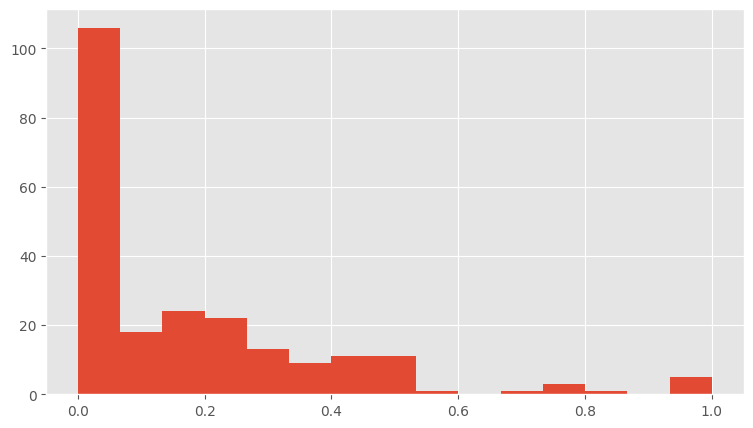

In [16]:
plot(metric)

### Recobrado

In [17]:
metric='Rec'

RESULTS[metric] =np.fromiter((
    METRICS[metric].calculate_all(IRS, QRELS)),dtype=float)


In [18]:
print_results(metric)

Promedio: 0.27078
Máximo: 1.00000
Mínimo: 0.00000
Moda: [0.03285]
Mediana: 0.14286
Desviación estándar: 0.33744

Cuartiles:
	Q1:0.0
	Q3:0.42857142857142855


,Frecuencia Absoluta,Frecuencia Relativa,Porcentaje,Marca de Clase
Intervalo,,,,
"(-0.001, 0.0667]",100,0.444444,44.444444,0.03285
"(0.0667, 0.133]",10,0.044444,4.444444,0.09985
"(0.133, 0.2]",19,0.084444,8.444444,0.16650
"(0.2, 0.267]",13,0.057778,5.777778,0.23350
"(0.267, 0.333]",15,0.066667,6.666667,0.30000
"(0.333, 0.4]",11,0.048889,4.888889,0.36650
"(0.4, 0.467]",5,0.022222,2.222222,0.43350
"(0.467, 0.533]",9,0.040000,4.000000,0.50000
"(0.533, 0.6]",5,0.022222,2.222222,0.56650


#### Histograma de frecuencia

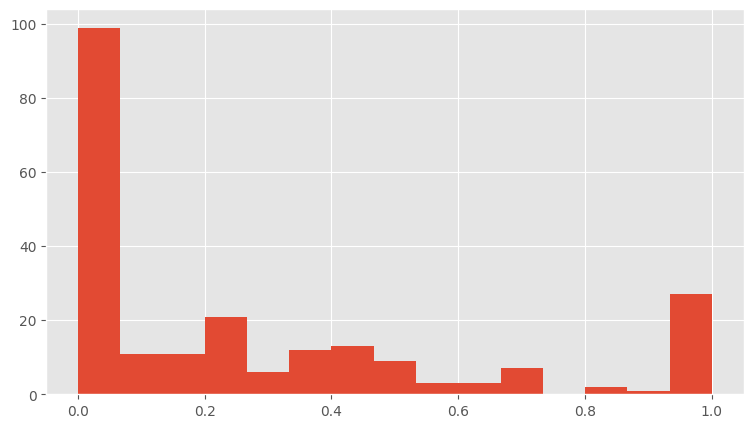

In [19]:
plot(metric)

### Formula F1

In [20]:
metric='F1'

RESULTS[metric] =np.fromiter((
    METRICS[metric].calculate_all(IRS, QRELS)),dtype=float)



In [21]:
print_results(metric)

Promedio: 0.14946
Máximo: 0.70588
Mínimo: 0.00000
Moda: [0.023197000000000002]
Mediana: 0.10000
Desviación estándar: 0.18148

Cuartiles:
	Q1:0.0
	Q3:0.25


,Frecuencia Absoluta,Frecuencia Relativa,Porcentaje,Marca de Clase
Intervalo,,,,
"(-0.000706, 0.0471]",107,0.475556,47.555556,0.023197
"(0.0471, 0.0941]",4,0.017778,1.777778,0.070600
"(0.0941, 0.141]",17,0.075556,7.555556,0.117550
"(0.141, 0.188]",15,0.066667,6.666667,0.164500
"(0.188, 0.235]",23,0.102222,10.222222,0.211500
"(0.235, 0.282]",11,0.048889,4.888889,0.258500
"(0.282, 0.329]",9,0.040000,4.000000,0.305500
"(0.329, 0.376]",10,0.044444,4.444444,0.352500
"(0.376, 0.424]",6,0.026667,2.666667,0.400000


#### Histograma de frecuencia

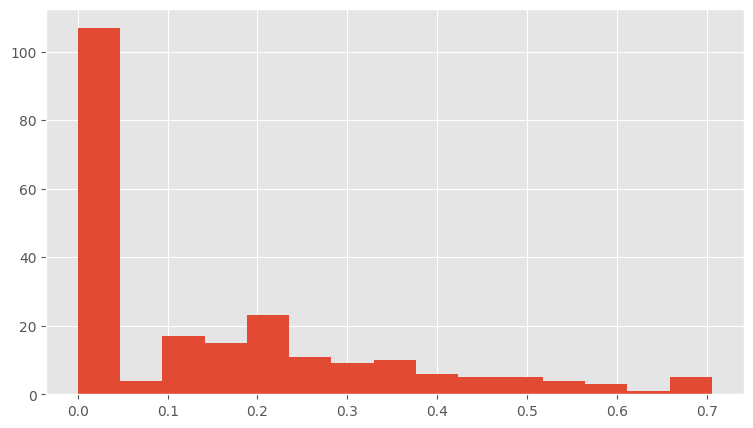

In [22]:
plot(metric)

### Relevancia máxima


In [23]:
metric='Max'

RESULTS[metric] =np.fromiter((
    METRICS[metric].calculate_all(IRS, QRELS)),dtype=float)



In [24]:
print_results(metric)

Promedio: 0.64214
Máximo: 0.90468
Mínimo: 0.35333
Moda: [0.5925]
Mediana: 0.63278
Desviación estándar: 0.11190

Cuartiles:
	Q1:0.5599669133292239
	Q3:0.7142341887883278


,Frecuencia Absoluta,Frecuencia Relativa,Porcentaje,Marca de Clase
Intervalo,,,,
"(0.353, 0.39]",1,0.004444,0.444444,0.3715
"(0.39, 0.427]",2,0.008889,0.888889,0.4085
"(0.427, 0.464]",6,0.026667,2.666667,0.4455
"(0.464, 0.5]",9,0.040000,4.000000,0.4820
"(0.5, 0.537]",23,0.102222,10.222222,0.5185
"(0.537, 0.574]",27,0.120000,12.000000,0.5555
"(0.574, 0.611]",33,0.146667,14.666667,0.5925
"(0.611, 0.647]",27,0.120000,12.000000,0.6290
"(0.647, 0.684]",23,0.102222,10.222222,0.6655


#### Histograma de frecuencia

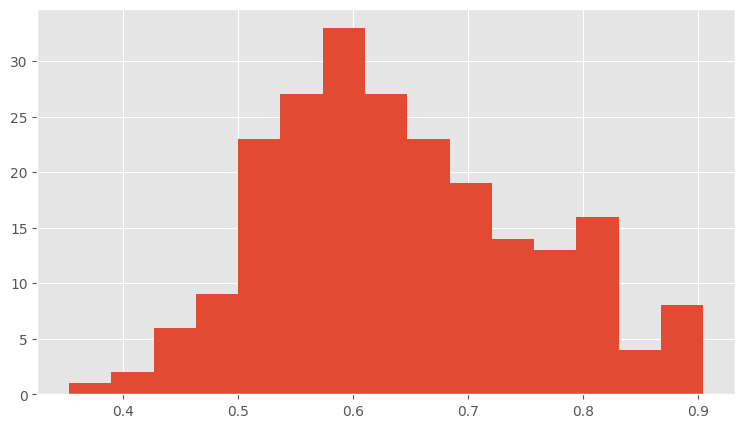

In [25]:
plot(metric)